In [82]:
#Necessary libraries
import praw
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import string
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer    
from nltk.corpus import stopwords
from collections import Counter
import numpy as np
##nltk.download('stopwords')
set(stopwords.words('english'))
ps = PorterStemmer() 

In [83]:
#Id to scrape
my_client_id = "tlaYd7tsDOqvlQ"
my_client_secret = "xdRqwLkA07r8ScyJZTMsYUndrSA"
my_user_agent = "scrapping r/india"
np.random.seed(500)

In [84]:
#Helper function to print full panda data frame to analyze data
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    pd.set_option('display.max_colwidth', 950)
    print(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_colwidth')

In [85]:
# API to access reddit data
reddit = praw.Reddit(client_id=my_client_id, client_secret=my_client_secret, user_agent=my_user_agent)
india_subreddit = reddit.subreddit('India')

## Data Collection
1. Getting TOP, HOT and NEW posts of reddit using the praw API 
2. Many JSON tags are retrived which may or may not be used in future 
3. https://github.com/reddit-archive/reddit/wiki/JSON used to study the tags 
4. This is done to get all the types of posts and not be trained on only one type. Also increases training data


In [86]:
top_posts = []
for post in india_subreddit.top(limit=1000):
    top_posts.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post.created,post.link_flair_text])

hot_posts = []
for post in india_subreddit.hot(limit=1000):
    hot_posts.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post.created,post.link_flair_text])

new_posts = []
for post in india_subreddit.new(limit=1000):
    new_posts.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post.created,post.link_flair_text])


## Exploratory Data Analysis

1. Converting the data obtained into data frames for analyzing and combining the three types of data with duplicates removed
2. Adding a text column that is title + body
3. Removing NONE instances

In [87]:
top_posts = pd.DataFrame(top_posts,columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created','flare'])
hot_posts = pd.DataFrame(hot_posts,columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created','flare'])
new_posts = pd.DataFrame(new_posts,columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created','flare'])

frames = [top_posts, hot_posts, new_posts]
data = pd.concat(frames)
data.drop_duplicates(keep='last',inplace=True)
data['text'] = data['title'].str.cat(data['body'], sep =" ")
data = data.mask(data.eq('None')).dropna()
data.describe()

/Users/yatingupta/Github/Reddit-flare-detector/env/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,score,num_comments,created
count,2377.000000,2377.000000,2.377000e+03
mean,1145.099285,97.216239,1.573947e+09
std,1681.412560,232.189397,2.416236e+07
min,0.000000,0.000000,1.423102e+09
25%,17.000000,3.000000,1.570279e+09
50%,147.000000,27.000000,1.587209e+09
75%,1939.000000,132.000000,1.587329e+09
max,19714.000000,6913.000000,1.587478e+09


#### Here we analyze the division of count of posts in respective flares
This will tell how many and which flares are prominent

In [88]:
data['flare'].value_counts()

Non-Political                     667
Coronavirus                       560
Politics                          490
AskIndia                          228
Policy/Economy                    104
Photography                        64
Business/Finance                   58
Science/Technology                 35
[R]eddiquette                      34
Sports                             32
Food                               26
Unverified                         17
Scheduled                          16
CAA-NRC                            10
CAA-NRC-NPR                         7
r/all                               3
Policy & Economy                    2
Old                                 2
/r/all                              2
Demonetization                      2
AMA                                 2
Misleading Headline                 1
On Internet Shutdowns               1
Official Sadness Thread             1
Totally real                        1
Goal Achieved!!!                    1
Original Com

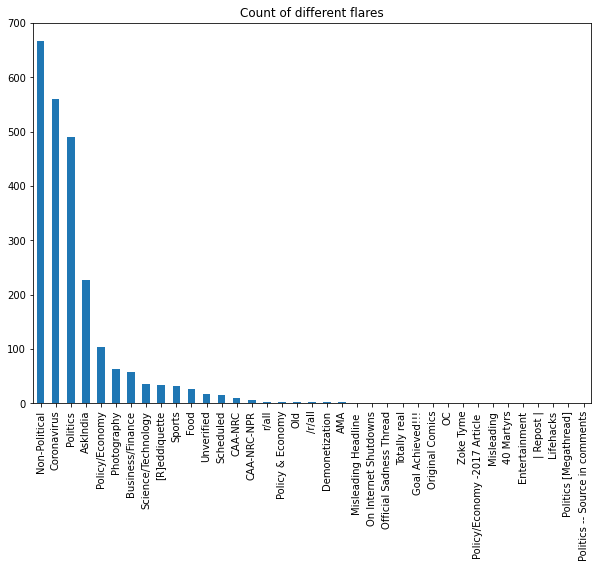

In [89]:
ax, fig = plt.subplots(figsize=(10, 7))
flare_class = data["flare"].value_counts()
flare_class.plot(kind= 'bar')
plt.title('Count of different flares')
plt.show()

### Analyzing the word cloud of the four main Flares - Coronavirus, non-political, politics, askindia
This is done to visualize which words are more used wrt flares

In [90]:
from wordcloud import WordCloud
stop_words = stopwords.words("english")

Coronavirus = data[data["flare"] == "Coronavirus"]
Non_Political = data[data["flare"] == "Non-Political"]
Politics = data[data["flare"] == "Politics"]
AskIndia = data[data["flare"] == "AskIndia"]

Coronavirus_words = ''
Non_Political_words = ''
Politics_words = ''
AskIndia_words = ''

#Extracting words wrt flares

for t in Coronavirus.text:
    text = t.lower()
    tokens = word_tokenize(text)
    for w in tokens:
        Coronavirus_words = Coronavirus_words + w + ' '
        
for t in Non_Political.text:
    text = t.lower()
    tokens = word_tokenize(text)
    for w in tokens:
        Non_Political_words = Non_Political_words + w + ' '
        
for t in Politics.text:
    text = t.lower()
    tokens = word_tokenize(text)
    for w in tokens:
        Politics_words = Politics_words + w + ' '
        
for t in AskIndia.text:
    text = t.lower()
    tokens = word_tokenize(text)
    for w in tokens:
        AskIndia_words = AskIndia_words + w + ' '        


#### Coronavirus Wordcloud

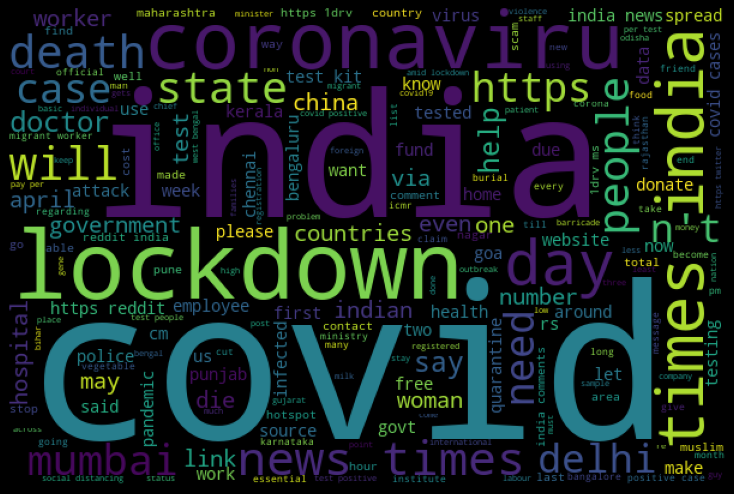

In [91]:
# Generate a word cloud image
wordcloud = WordCloud(width=600, height=400).generate(Coronavirus_words)
#Insincere Word cloud
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

#### Non-politcal Word Cloud

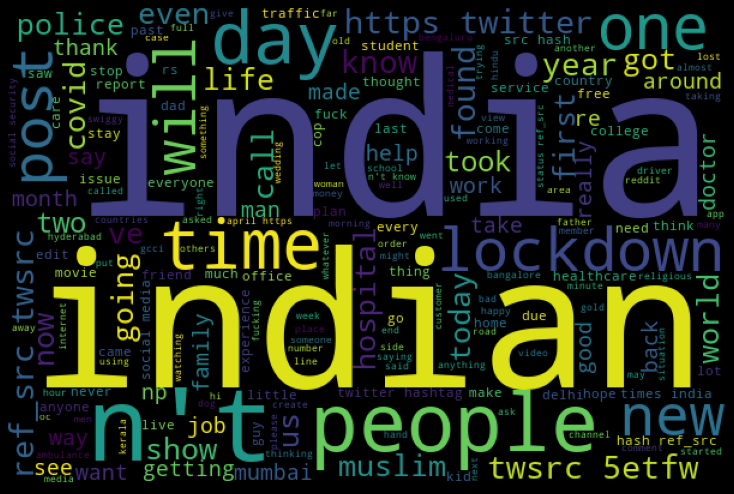

In [92]:
# Generate a word cloud image
wordcloud = WordCloud(width=600, height=400).generate(Non_Political_words)
#Insincere Word cloud
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

#### Politics words Word Cloud

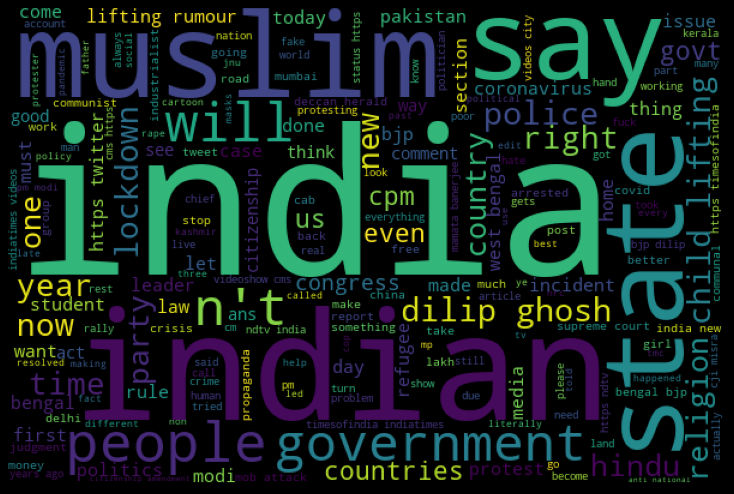

In [93]:
# Generate a word cloud image
wordcloud = WordCloud(width=600, height=400).generate(Politics_words)
#Insincere Word cloud
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

#### Ask India words, Word Cloud

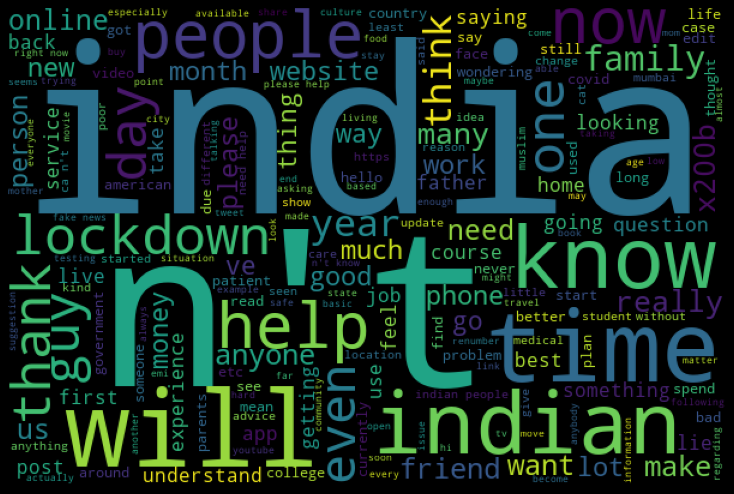

In [94]:
# Generate a word cloud image
wordcloud = WordCloud(width=600, height=400).generate(AskIndia_words)
#Insincere Word cloud
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Comparison of length of posts and number of words used in different flare posts

In [95]:
Coronavirus["post_length"] = Coronavirus.text.apply(lambda x: len(x))
Non_Political["post_length"] = Non_Political.text.apply(lambda x: len(x))

Coronavirus['number_words'] = Coronavirus.text.apply(lambda x: len(x.split()))
Non_Political['number_words'] = Non_Political.text.apply(lambda x: len(x.split()))

print("Mean Length of Coronavirus Posts " + str(Coronavirus["post_length"].mean()))
print("Mean Length of Non Political Posts "  + str(Non_Political["post_length"].mean()))
print("Mean word usage of Coronavirus Posts "  + str(Coronavirus['number_words'].mean()))
print("Mean word usage of Non Political Posts "  + str(Non_Political['number_words'].mean()))


Mean Length of Coronavirus Posts 204.72142857142856
Mean Length of Non Political Posts 196.1304347826087
Mean word usage of Coronavirus Posts 30.92142857142857
Mean word usage of Non Political Posts 32.82008995502249


/Users/yatingupta/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/yatingupta/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/yatingupta/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

## Building the Flare Detector

Helper Function to build confusion matrix

In [96]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

#### Helper Functions
1. Preprocessing Textual data
2. Encodes Target Variable
3. Converts into TFIDF input texts
4. Naive Bayes
5. SVM
6. Random Forest
7. SGD
8. Logistic Regression   

In [97]:
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn import ensemble
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB

def preprocessing(data):
    emoji_pattern = re.compile("["
                       u"\U0001F600-\U0001F64F"  # emoticons
                       u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                       u"\U0001F680-\U0001F6FF"  # transport & map symbols
                       u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                       u"\U00002702-\U000027B0"
                       u"\U000024C2-\U0001F251"
                       "]+", flags=re.UNICODE)

    data = (data.str.lower() #lowercase
                               .str.replace(r'[^\w\s]+', '') #rem punctuation 
                               .str.replace(emoji_pattern, '') #rem emoji
                               .str.replace(r'http\S+','') #rem links
                               .str.strip() #rem trailing whitespaces
                               .str.split()) #split by whitespaces

    res = []
    stop_words = set(stopwords.words('english')) 
    empty = ['removed','deleted','nan']
    
    #Removing stop words, empty words and stemming the words
    for i in data:
        t = ""
        for j in i:
            if j not in stop_words and j not in empty:
                w = ps.stem(j)
                t += w
                t += " "
        res.append(t)
    data = res
    return data

def encode(Y,train_y,test_y):
    encoder = LabelEncoder()
    Y = encoder.fit_transform(Y)
    train_y = encoder.transform(train_y)
    test_y = encoder.transform(test_y)
    return Y,train_y,test_y, encoder

def tfidf(X,train_x,test_x):
    Tfidf_vect = TfidfVectorizer()
    Tfidf_vect.fit(X)
    X = Tfidf_vect.transform(X)
    train_x = Tfidf_vect.transform(train_x)
    test_x = Tfidf_vect.transform(test_x)
    return X, train_x, test_x, Tfidf_vect

def Naive_Bayes_Classifier(train_x,train_y,test_x,test_y):
    # fit the training dataset on the NB classifier
    Naive = MultinomialNB()
    Naive.fit(train_x, train_y)
    # predict the labels on validation dataset
    predictions_NB = Naive.predict(test_x)
    print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, test_y)*100)
    
    return Naive

def SVM_Classifier(train_x,train_y,test_x,test_y):
    # fit the training dataset on the classifier
    SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
    SVM.fit(train_x,train_y)
    # predict the labels on validation dataset
    predictions_SVM = SVM.predict(test_x)
    
    print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, test_y)*100)
    return SVM

def Random_Forest_Classifier(train_x,train_y,test_x,test_y):
    random_forest_classfier = ensemble.RandomForestClassifier()
    random_forest_classfier.fit(train_x,train_y)
    predictions_RF = random_forest_classfier.predict(test_x)
    
    print("RF Accuracy Score -> ",accuracy_score(predictions_RF, test_y)*100)
    return random_forest_classfier

def SGD_Classifier(train_x,train_y,test_x,test_y):
    sgd = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)
    sgd.fit(train_x,train_y)
    # predict the labels on validation dataset
    predictions_sgd = sgd.predict(test_x)
    print("SGD Accuracy Score -> ",accuracy_score(predictions_sgd, test_y)*100)
    return sgd

def Logistic_Regression_Classifier(train_x,train_y,test_x,test_y):
    Logistic_Regression = LogisticRegression(n_jobs=1, C=1e5,max_iter=2000)
    Logistic_Regression.fit(train_x,train_y)
    # predict the labels on validation dataset
    predictions_Logistic_Regression = Logistic_Regression.predict(test_x)
    print("Logistic_Regression Accuracy Score -> ",accuracy_score(predictions_Logistic_Regression, test_y)*100)
    return Logistic_Regression


# Part I
### Data Collection
1. The required data here is extracted from data collected earlier 
2. The TOP, HOT and NEW posts are concatenated in frame 
3. Duplicates are removed 
4. Creating a text column which concatenates the title and body text 
5. Since the number of flare was large (40), all the flares with less than 3 posts are deleted here to improve model performance 
6. ALL the rows with NONE data are removed  

In [98]:
top_text_flare_data = top_posts[['id','title','body','flare']]
hot_text_flare_data = hot_posts[['id','title','body','flare']]
new_text_flare_data = new_posts[['id','title','body','flare']]
frames = [top_text_flare_data, hot_text_flare_data, new_text_flare_data]
data = pd.concat(frames)

data.drop_duplicates(keep='last',inplace=True)
data['text'] = data['title'].str.cat(data['body'], sep =" ")
data = data.groupby('flare').filter(lambda x : len(x)>3)

data = data.mask(data.eq('None')).dropna()
data.describe()

,id,title,body,flare,text
count,1808,1808,1808,1808,1808
unique,1808,1794,313,15,1796
top,f49r0g,Late Night Random Discussion Thread !,,Non-Political,Late Night Random Discussion Thread ! ^Beep ^B...
freq,1,4,1487,567,4


1. Preprocessing, splitting into training and test data.<br>
2. Encoding and vectorizing the data

In [99]:
# X = the entire text data , Y = entire target or flares
X = data['text']
Y = data['flare']

train_x, test_x, train_y, test_y = model_selection.train_test_split(X, Y,test_size=0.3)
Y,train_y,test_y, encoder = encode(Y,train_y,test_y)
X,train_x,test_x, Tfidf_vect = tfidf(X,train_x,test_x)

### Calculating Accuracy of different ML algo

In [100]:
Naive = Naive_Bayes_Classifier(train_x, train_y, test_x, test_y)
SVM = SVM_Classifier(train_x, train_y, test_x, test_y)
Random_Forest = Random_Forest_Classifier(train_x, train_y, test_x, test_y)
SGD =  SGD_Classifier(train_x, train_y, test_x, test_y)
Logistic_Regression = Logistic_Regression_Classifier(train_x, train_y, test_x, test_y)

Naive Bayes Accuracy Score ->  45.85635359116022
SVM Accuracy Score ->  56.353591160220994
RF Accuracy Score ->  51.93370165745856
SGD Accuracy Score ->  57.4585635359116
Logistic_Regression Accuracy Score ->  54.88029465930019


#### Building a confusion matrix to analyze the results from the best classifier yet (sgd) 

Normalized confusion matrix


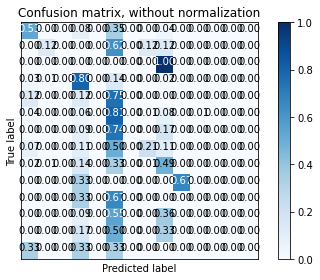

In [101]:
from sklearn.metrics import confusion_matrix
predictions_sgd = SGD.predict(test_x)
cm = confusion_matrix(test_y, predictions_sgd)
plt.figure()
plot_confusion_matrix(cm, classes=[],normalize=True,
                      title='Confusion matrix, without normalization')

# Part II
1. Since most of the cm is 0 or very less values here the dataset is reduced
2. Now, only flares with greater than 100 posts are used.
3. Data is already preprocessed here

In [102]:
data = data.groupby('flare').filter(lambda x : len(x)>100)

#### Data obtained above is divided into train,test and vectorized /encoded

In [103]:
# X = the entire text data , Y = entire target or flares
X = data['text']
Y = data['flare']

train_x, test_x, train_y, test_y = model_selection.train_test_split(X, Y,test_size=0.3)
Y,train_y,test_y, encoder = encode(Y,train_y,test_y)
X,train_x,test_x, Tfidf_vect = tfidf(X,train_x,test_x)

#### Accuracy is measured from this data

In [104]:
Naive = Naive_Bayes_Classifier(train_x, train_y, test_x, test_y)
SVM = SVM_Classifier(train_x, train_y, test_x, test_y)
Random_Forest = Random_Forest_Classifier(train_x, train_y, test_x, test_y)
SGD =  SGD_Classifier(train_x, train_y, test_x, test_y)
Logistic_Regression = Logistic_Regression_Classifier(train_x, train_y, test_x, test_y)

Naive Bayes Accuracy Score ->  53.79464285714286
SVM Accuracy Score ->  68.30357142857143
RF Accuracy Score ->  60.26785714285714
SGD Accuracy Score ->  68.30357142857143
Logistic_Regression Accuracy Score ->  65.625


#### Data is oversampled
( Data used is already encoded and vectorized here )

In [105]:
from imblearn.over_sampling import SMOTE
smote = SMOTE('minority')
X, Y = smote.fit_resample(X, Y)
train_x, test_x, train_y, test_y = model_selection.train_test_split(X, Y,test_size=0.3)

#### Accuracy is measured from the oversampled data

In [106]:
Naive = Naive_Bayes_Classifier(train_x, train_y, test_x, test_y)
SVM = SVM_Classifier(train_x, train_y, test_x, test_y)
Random_Forest = Random_Forest_Classifier(train_x, train_y, test_x, test_y)
SGD =  SGD_Classifier(train_x, train_y, test_x, test_y)
Logistic_Regression = Logistic_Regression_Classifier(train_x, train_y, test_x, test_y)

Naive Bayes Accuracy Score ->  54.79930191972077
SVM Accuracy Score ->  74.17102966841188
RF Accuracy Score ->  71.02966841186736
SGD Accuracy Score ->  74.86910994764398
Logistic_Regression Accuracy Score ->  74.17102966841188


Normalized confusion matrix


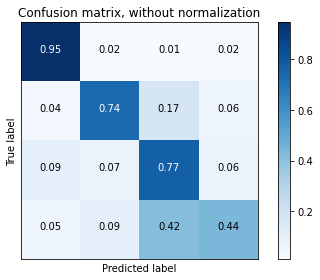

In [107]:
from sklearn.metrics import confusion_matrix
predictions_sgd = SGD.predict(test_x)
cm = confusion_matrix(test_y, predictions_sgd)
plt.figure()
plot_confusion_matrix(cm, classes=[],normalize=True,
                      title='Confusion matrix, without normalization')

### The confusion matrix indicates better values than previous one

# Part III
1. Using the Pushshift data, reddit r/india is scrapped for 2 years data.
2. Here data is repeadtly scrapped in counts of 1000 posts from Jan 1 2018 to 10th April 2020.
3. Calls to reddit API after every 1000 posts as that is the limit.
4. This function takes a approx 10-20 minutes.
5. Pandas dataframe is downloaded once the download finishes.

In [108]:
import requests
import json
import datetime

def getPushshiftData(after, before, sub):
    url = 'https://api.pushshift.io/reddit/search/submission/?size=1000&after='+str(after)+'&before='+str(before)+'&subreddit='+str(sub)
    r = requests.get(url)
    data = json.loads(r.text)
    return data['data']

# This Function downloads data using pushshift API, from 'after' time to 'before' time, in 1000 posts iterations
# Then after the data is collected it is made into a pandas dataframe which is downloaded so that the function is not used again 
# since this function takes a lot of time to execute
def getData():
    
    subData = []
    subCount = 0
    #Subreddit to query
    sub='india'
    
    #before and after dates
    #unix time is provided
    after = "1514764800"  #January 1st 2018
    before = "1586476800" #10th April 2020

    data = getPushshiftData(after, before, sub)

    while len(data) > 0:
        for submission in data:
            try:
                flare = submission['link_flair_text']
            except KeyError:
                flare = None

            if flare == None:
                continue

            sub_id = submission['id']
            title = submission['title']
            try:
                selftext = submission['selftext']
            except KeyError:
                selftext = None

            subData.append([sub_id,title,selftext,flare])    
            subCount+=1
        print(str(datetime.datetime.fromtimestamp(data[-1]['created_utc'])),end = " ")
        #after every 1000 posts,after time is changed for API by using the last post extracted
        after = data[-1]['created_utc']
        data = getPushshiftData(after, before, sub)

    original_expanded_data = pd.DataFrame(subData,columns=['id', 'title', 'body', 'flare'])
    original_expanded_data.describe()
    original_expanded_data.to_pickle("original_expanded_data.pkl") 

### Analyzing the new expanded data flare count

In [142]:
expanded_data = pd.read_pickle("original_expanded_data.pkl")
expanded_data.drop_duplicates(keep='last',inplace=True)
expanded_data['text'] = expanded_data['title'].str.cat(expanded_data['body'], sep =" ")
expanded_data['flare'].value_counts()

Politics                                             60969
Non-Political                                        59573
AskIndia                                             33075
Business/Finance                                     13181
Science/Technology                                   10257
                                                     ...  
Low-effort Self Post. Personal/Unverified Twitter        1
Not Original Title. [OLD] Content. Repost.               1
Not India specific                                       1
Unverified AMA                                           1
Low-effort Self Post. Repost;                            1
Name: flare, Length: 222, dtype: int64

### Filtering out the flares which have 3000 posts +

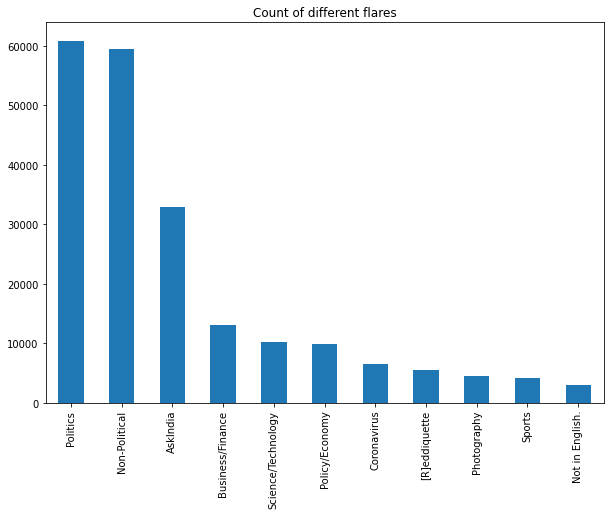

In [147]:
expanded_data = expanded_data.groupby('flare').filter(lambda x : len(x)>3000)
ax, fig = plt.subplots(figsize=(10, 7))
flare_class = expanded_data["flare"].value_counts()
flare_class.plot(kind= 'bar')
plt.title('Count of different flares')
plt.show()

#### Cleaning the collected data

In [148]:
expanded_data = expanded_data.mask(expanded_data.eq('None')).dropna()
expanded_data['text'] = preprocessing(expanded_data['text'])
expanded_data['flare'].value_counts()

Politics              60904
Non-Political         59430
AskIndia              32861
Business/Finance      13169
Science/Technology    10245
Policy/Economy         9858
Coronavirus            6563
[R]eddiquette          5522
Photography            4545
Sports                 4117
Not in English.        3031
Name: flare, dtype: int64

#### Encoding/vectorizing the data

In [149]:
# X = the entire text data , Y = entire target or flares
X = expanded_data['text']
Y = expanded_data['flare']

train_x, test_x, train_y, test_y = model_selection.train_test_split(X, Y,test_size=0.3)
X,train_x,test_x,Tfidf_vect = tfidf(X,train_x,test_x)
Y,train_y,test_y,encoder = encode(Y,train_y,test_y)

#### Undersampling the Data since data is unbalanced

In [150]:
from imblearn.under_sampling import RandomUnderSampler

print('Original dataset shape %s' % Counter(Y))

rus = RandomUnderSampler(random_state=42)
X, Y = rus.fit_resample(X, Y)
train_x, test_x, train_y, test_y = model_selection.train_test_split(X, Y,test_size=0.3)

print(Counter(Y))

Original dataset shape Counter({7: 60904, 3: 59430, 0: 32861, 1: 13169, 8: 10245, 6: 9858, 2: 6563, 10: 5522, 5: 4545, 9: 4117, 4: 3031})
Counter({0: 3031, 1: 3031, 2: 3031, 3: 3031, 4: 3031, 5: 3031, 6: 3031, 7: 3031, 8: 3031, 9: 3031, 10: 3031})


### Getting Accuracy from this data
SVM and logistic regression are commented out since they take a lot of time to train

In [ ]:
Naive = Naive_Bayes_Classifier(train_x, train_y, test_x, test_y)
Random_Forest = Random_Forest_Classifier(train_x, train_y, test_x, test_y)
SGD =  SGD_Classifier(train_x, train_y, test_x, test_y)
SVM = SVM_Classifier(train_x, train_y, test_x, test_y)
Logistic_Regression = Logistic_Regression_Classifier(train_x, train_y, test_x, test_y)

Normalized confusion matrix


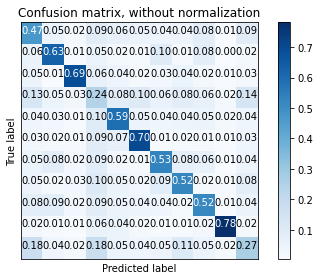

In [155]:
from sklearn.metrics import confusion_matrix
predictions_SVM = SVM.predict(test_x)
cm = confusion_matrix(test_y, predictions_SVM)

plt.figure()
plot_confusion_matrix(cm, classes=[],normalize=True,
                      title='Confusion matrix, without normalization')

#### Below code will download the model, tfidf vectorizer and encoder to be directly used in Web App

In [154]:
import pickle

# Using the trained Naive model
model = SVM
pickle.dump(model, open("model.pkl","wb"))

# Taking the TfIDF and encoder
pickle.dump(Tfidf_vect, open("tfidf.pickle", "wb"))
np.save('classes.npy', encoder.classes_)

#### This is used to test the endpoint by sending request from test.txt

In [131]:
import requests

with open('test.txt', 'rb') as f:
    r = requests.post('https://reddit-flare-detector.herokuapp.com/automated_testing', files={'test.txt': f})
    a = r.json()
    print(a)

{'https://www.reddit.com/r/india/comments/fuug0q/ive_never_felt_so_helpless_please_help_our_family/?utm_medium=android_app&utm_source=share': 'Coronavirus', 'https://www.reddit.com/r/india/comments/fzobyi/anyone_else_sick_of_news_reporting_what/?utm_medium=android_app&utm_source=share': 'AskIndia', 'https://www.reddit.com/r/nextfuckinglevel/comments/g289tw/the_needle_galaxy_is_nearly_50_million_lightyears/': 'Science/Technology'}


#### Testing on Manual Examples
below example list is created on which the models will predict the flare

In [153]:
example_list = np.array(["Stuck in quarantine. Playing games all day","This. virus is killing me","Government of India needs to take action ","All the political ministers need to work for india"])
Example = pd.Series(example_list)
Example = preprocessing(Example)
Example_Tfidf = Tfidf_vect.transform(Example)
model = SVM
predict_example = model.predict(Example_Tfidf)
print(encoder.inverse_transform(predict_example))

['Coronavirus' 'Coronavirus' 'Policy/Economy' 'Politics']
